In [122]:
import matplotlib.pyplot as plt 
import networkx as nx 
import numpy as np 

In [123]:
G = nx.Graph()
G.add_edge("A", "1", capacity=2.0)
G.add_edge("A", "2", capacity=2.0)
G.add_edge("A", "3", capacity=2.0)
G.add_edge("A", "4", capacity=2.0)

G.add_edge("1", "2", capacity=2.0)
G.add_edge("1", "5", capacity=2.0)
G.add_edge("1", "6", capacity=2.0)

G.add_edge("2", "6", capacity=2.0)
G.add_edge("2", "3", capacity=2.0)

G.add_edge("3", "7", capacity=2.0)
G.add_edge("3", "4", capacity=2.0)

G.add_edge("4", "7", capacity=2.0)
G.add_edge("4", "8", capacity=2.0)

G.add_edge("5", "6", capacity=2.0)
G.add_edge("5", "B", capacity=2.0)

G.add_edge("6", "7", capacity=2.0)
G.add_edge("6", "B", capacity=2.0)

G.add_edge("7", "8", capacity=2.0)
G.add_edge("7", "B", capacity=2.0)

G.add_edge("8", "B", capacity=2.0)

In [124]:
print(G.edges)

[('A', '1'), ('A', '2'), ('A', '3'), ('A', '4'), ('1', '2'), ('1', '5'), ('1', '6'), ('2', '6'), ('2', '3'), ('3', '7'), ('3', '4'), ('4', '7'), ('4', '8'), ('5', '6'), ('5', 'B'), ('6', '7'), ('6', 'B'), ('7', '8'), ('7', 'B'), ('8', 'B')]


In [125]:
pos = {
        'A':(-2,0),
        '1':(-1,1.5),
        '2':(-1,0.5),
        '3':(-1,-0.5),
        '4':(-1,-1.5),
        '5':(0,1.5),
        '6': (0,0.5),
        '7':(0,-0.5),
        '8':(0,-1.5),
        'B':(1,-0),
       }

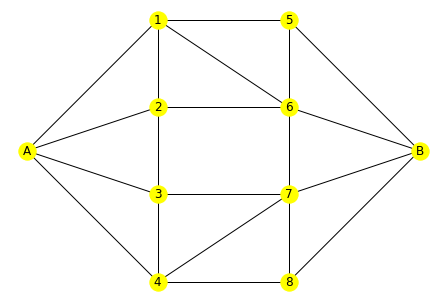

In [126]:
nx.draw(G, pos= pos,with_labels=True,node_size=300,node_color='yellow')

In [127]:
cut_value, partition = nx.minimum_cut(G, "A", "B")
reachable, non_reachable = partition

In [128]:
cutset = set()
for u, nbrs in ((n, G[n]) for n in reachable):
    cutset.update((u, v) for v in nbrs if v in non_reachable)
print(sorted(cutset))

cut_value == sum(G.edges[u, v]["capacity"] for (u, v) in cutset)

[('5', 'B'), ('6', 'B'), ('7', 'B'), ('8', 'B')]


True

In [129]:
from networkx.algorithms.flow import shortest_augmenting_path
node_cut = nx.minimum_node_cut(G, flow_func=shortest_augmenting_path)
print(node_cut)

{'B', '6', '1'}
